In [9]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



#Initial Data Inspection
dominos = pd.read_csv('Dominos_Stock_Data.csv')
dominos

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,254.89,257.61,253.08,255.96,251.60,525200
1,2019-10-17,256.12,259.96,255.78,256.45,252.09,515100
2,2019-10-18,257.45,258.40,254.23,255.70,251.35,609900
3,2019-10-21,256.61,259.84,255.67,257.52,253.14,499600
4,2019-10-22,257.27,259.47,255.38,258.94,254.53,343100
...,...,...,...,...,...,...,...
500,2021-10-11,477.88,484.46,472.43,479.48,479.48,359600
501,2021-10-12,481.37,483.16,476.13,480.05,480.05,413500
502,2021-10-13,479.72,480.46,474.03,476.28,476.28,629700
503,2021-10-14,461.00,489.89,455.96,477.48,477.48,1518300


In [10]:
#Finds number of rows and columns.
dominos.shape

(505, 7)

In [11]:
#Finds what columns exist in the dataset.
dominos.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
#Data types being stored in each column.
dominos.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
#Finding any null values in the dataset.
dominos.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
#Summary Statistics 
dominos.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,385.391723,390.291347,380.870416,385.614693,382.575584,6.996162e+05
std,67.485552,67.673877,67.327659,67.378659,68.525904,5.993578e+05
min,254.890000,257.610000,253.080000,255.700000,251.350000,1.843000e+05
25%,353.730000,360.580000,347.730000,354.620000,350.690000,4.495000e+05
50%,384.600000,387.580000,380.910000,383.920000,380.590000,5.776000e+05
75%,418.090000,423.110000,415.740000,419.700000,415.290000,7.863000e+05
max,541.990000,548.720000,536.110000,540.470000,539.480000,1.027880e+07


In [15]:
#Changes the data type stored in the data column.
dominos['Date'] = pd.to_datetime(dominos['Date'])

In [16]:
#Finds start date.
dominos['Date'].min()

Timestamp('2019-10-16 00:00:00')

In [17]:
#Finds end date.
dominos['Date'].max()

Timestamp('2021-10-15 00:00:00')

In [18]:
#Correlation matrix
dominos.corr()

C:\Users\mamic\AppData\Local\Temp\ipykernel_31416\3851530736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dominos.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.996773,0.997980,0.995542,0.995534,-0.175188
High,0.996773,1.000000,0.995794,0.997934,0.997772,-0.147154
Low,0.997980,0.995794,1.000000,0.997341,0.997395,-0.187099
Close,0.995542,0.997934,0.997341,1.000000,0.999897,-0.163411
Adj Close,0.995534,0.997772,0.997395,0.999897,1.000000,-0.165840
Volume,-0.175188,-0.147154,-0.187099,-0.163411,-0.165840,1.000000


In [19]:
#Finding any duplicate rows. 
dominos.duplicated().sum()

0

In [20]:
#Finds if there exists any outliers. 
z_scores = stats.zscore(dominos['Close']) 
dominos[(z_scores > 3) | (z_scores < -3)]

,Date,Open,High,Low,Close,Adj Close,Volume


In [21]:
#Find top 5 days with highest trader action.
dominos.nlargest(5,'Volume')

,Date,Open,High,Low,Close,Adj Close,Volume
142,2020-05-11,369.15,382.73,365.03,377.49,372.76,10278800
86,2020-02-20,362.03,381.86,356.96,373.16,367.62,5009700
247,2020-10-08,405.90,410.92,394.90,401.01,397.58,3793100
444,2021-07-22,484.99,548.72,484.00,538.82,537.83,3038100
342,2021-02-25,340.00,344.19,331.22,339.00,336.79,2628600


In [22]:
#Find top 5 days with lowest trader action. 
dominos.nsmallest(5,'Volume')

,Date,Open,High,Low,Close,Adj Close,Volume
301,2020-12-24,402.52,404.56,395.66,396.73,394.14,184300
469,2021-08-26,512.46,514.49,508.44,510.59,509.65,238200
470,2021-08-27,508.03,513.06,508.03,511.87,510.93,238700
492,2021-09-29,486.66,488.36,482.42,483.00,483.00,248300
488,2021-09-23,497.88,498.88,492.50,492.81,492.81,252100


In [23]:
#Drops Adj Close column in the dataset.
dominos.drop('Adj Close', axis = 1, inplace = True)

In [24]:
#Sets index to the date.
dominos.set_index('Date', inplace=True)

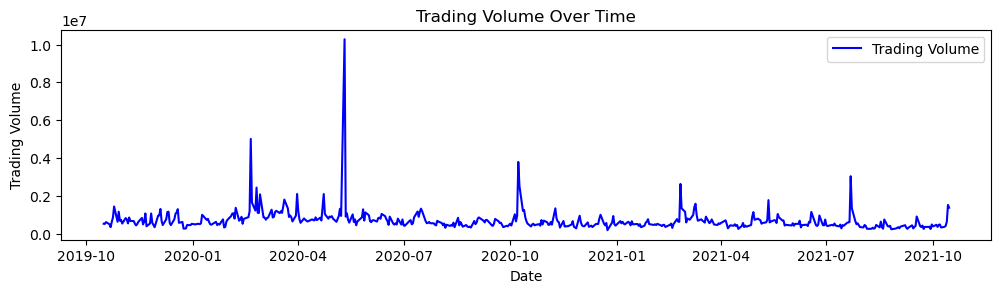

In [25]:
#Visualizes trading volume overtime. 
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(dominos.index, dominos['Volume'], color='blue', label='Trading Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()


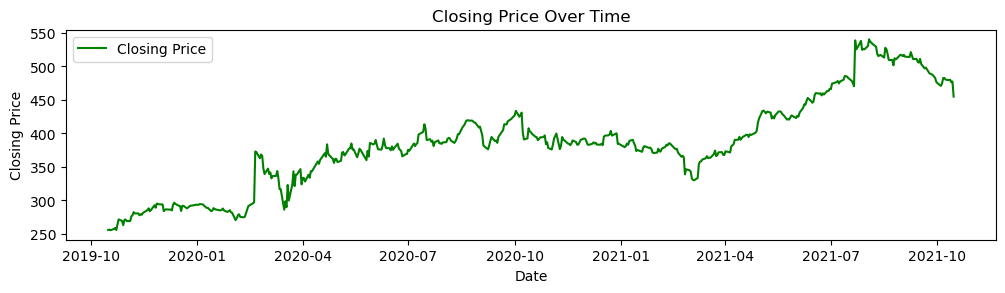

In [26]:
#Visualizes closing price overtime.
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
plt.plot(dominos.index, dominos['Close'], color='green', label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

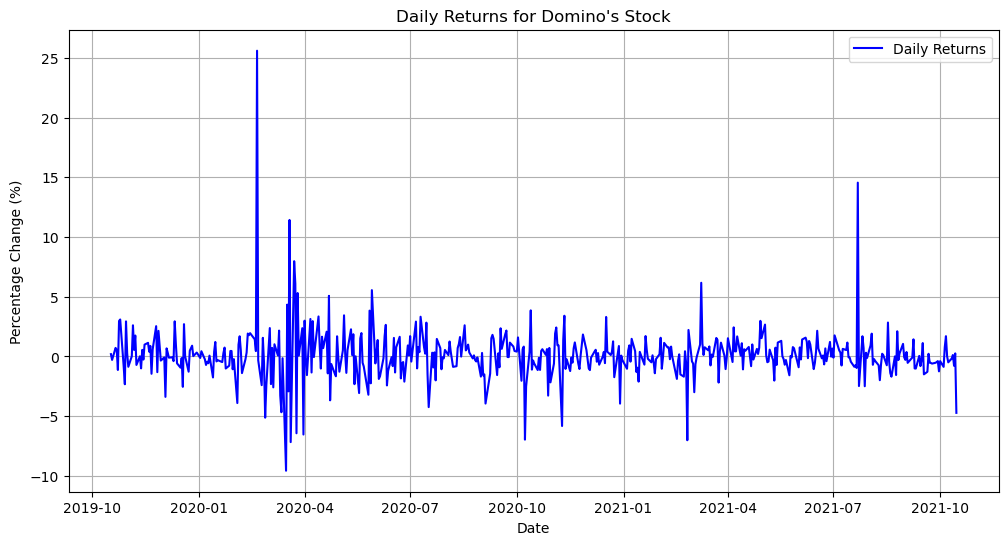

In [27]:
#Creates Return column as a percent change, resets the index, and visualizes it overtime. 
dominos.reset_index(inplace=True)
dominos['Return'] = dominos['Close'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(dominos['Date'], dominos['Return'], label='Daily Returns', color='blue')
plt.title('Daily Returns for Domino\'s Stock')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
#Fills the na in the return column, sets it equal to 0. Does not affect the visualization above. 
dominos['Return'].fillna(0,inplace=True)

In [29]:
#Creates year column and shows the mean return for each year.
dominos['Year'] = dominos['Date'].dt.year
dominos.groupby('Year')['Return'].mean()

Year
2019    0.270001
2020    0.141122
2021    0.098777
Name: Return, dtype: float64

In [30]:
#Finds the number of days with consecutive positive returns.
conin = (dominos['Return']> 0)
conin.groupby((~conin).cumsum()).cumcount().max() + 1 

8

In [31]:
#Finds the number of days with consecutive negative returns. 
conde = (dominos['Return']> 0)
conde.groupby((~conde).cumsum()).cumcount().max() + 1 

8

In [32]:
#Creates price gap column(Difference between opening price and closing price of the previous day).
dominos['Price Gap'] = (dominos['Open'] - dominos['Close'].shift(1))
dominos['Price Gap'].fillna(0,inplace=True)
dominos[dominos['Price Gap'].notna()].apply(lambda row: row['Return'], axis=1).mean()

0.13796142236277276

In [33]:
#Finds average price gap
dominos['Price Gap'].mean()

0.17310891089108943

In [34]:
#Find total return for 1 investing year which is 252 days 
investment_horizon = 252 
total_return = (1 + dominos['Return'] / 100).cumprod().tail(investment_horizon).prod() - 1
total_return

9.036274116179685e+54

In [35]:
#Finds the average price range for each year
dominos['Price Range'] = dominos['High'] - dominos['Low']
dominos.groupby('Year')['Price Range'].mean()

Year
2019     5.569245
2020    10.744111
2021     8.764523
Name: Price Range, dtype: float64

In [36]:
#Top five largest price ranges from low to high
dominos.nlargest(5,'Price Range')

,Date,Open,High,Low,Close,Volume,Return,Year,Price Gap,Price Range
444,2021-07-22,484.99,548.72,484.00,538.82,3038100,14.552374,2021,14.62,64.72
106,2020-03-19,292.00,337.22,289.34,323.14,1423000,11.427586,2020,2.00,47.88
107,2020-03-20,326.91,344.20,298.14,299.95,1802800,-7.176456,2020,3.77,46.06
108,2020-03-23,310.91,336.80,294.21,323.87,1340500,7.974662,2020,10.96,42.59
503,2021-10-14,461.00,489.89,455.96,477.48,1518300,0.251953,2021,-15.28,33.93


In [37]:
#Total number of days with positive returns
(dominos['Return'] > 0).apply(lambda x: x).mean() * 100
dominos['Return'].apply(lambda x: 1 if x > 0 else 0).sum()

260

In [38]:
#Total number of days with negative returns
(dominos['Return'] < 0).apply(lambda x: x).mean() * 100
dominos['Return'].apply(lambda x: 1 if x < 0 else 0).sum()

241

In [39]:
#Total number of days with 0 returns 
(dominos['Return'] == 0).apply(lambda x: x).mean() * 100
dominos['Return'].apply(lambda x: 1 if x == 0 else 0).sum()

4

C:\Users\mamic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mamic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


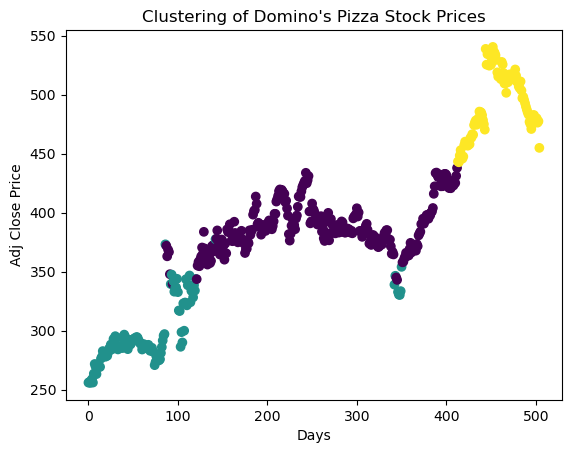

In [41]:
#Uses Kmeans clustering to visualize the data and its trends categorizing it into three different clusters. 
features = dominos[['Open', 'High', 'Low', 'Close', 'Volume']]
features_standardized = (features - features.mean()) / features.std()
kmeans = KMeans(n_clusters=3, random_state=42)
dominos['Cluster'] = kmeans.fit_predict(features_standardized)
plt.scatter(dominos.index, dominos['Close'], c=dominos['Cluster'], cmap='viridis')
plt.title('Clustering of Domino\'s Pizza Stock Prices')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.show()
